# Временные ряда. Домашняя работа №1.

**Скачайте материалы к ДЗ. Проанализируйте ряды, сделайте их стационарными.**

**Решением будет ссылка на гитхаб с ноутбуком.**

In [17]:
import pandas as pd
import numpy as np
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm
import statsmodels.tsa.api as smt
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt
from scipy.stats import boxcox
import seaborn as sns
sns.set()
%config InlineBackend.figure_format = 'svg' 
%matplotlib inline

In [2]:
autoData = pd.read_csv('monthly-us-auto-registration-tho.csv', sep=';')
autoData.columns = ['Month', 'Count']

indData = pd.read_csv('weekly-closings-of-the-dowjones-.csv', sep=',')
indData.columns = ['Month', 'Count']

In [3]:
def tsplot(y, lags=None, figsize=(10, 10), style='bmh'):
    test_stationarity(y)
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
    with plt.style.context(style):
        plt.figure(figsize=figsize)
        layout = (4, 1)
        ts_ax = plt.subplot2grid(layout, (0, 0), rowspan=2)
        acf_ax = plt.subplot2grid(layout, (2, 0))
        pacf_ax = plt.subplot2grid(layout, (3, 0))

        y.plot(ax=ts_ax, color='blue', label='Or')
        ts_ax.set_title('Original')

        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax, alpha=0.05)
        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax, alpha=0.05)

        plt.tight_layout()
    return


def test_stationarity(timeseries):
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    for [key, value] in dftest[4].items():
        dfoutput['Critical Value (%s)' % key] = value
    print(dfoutput)

    
def plot_ts_and_points(ts, start_point, step):
    new_series = [None for i in range(len(ts))]
    for i in range(len(ts)):
        pos = start_point + step * i
        if pos >= len(ts):
            break
        new_series[pos] = ts[pos]
    new_series = pd.Series(new_series)
    
    with plt.style.context('bmh'):
        plt.figure(figsize=(16, 8))
        ts_ax = plt.axes()
        ts.plot(ax=ts_ax, color='blue')
        new_series.plot(ax=ts_ax, style='ro')

# Часть №1

In [4]:
autoData.head()

,Month,Count
0,1947-01,209
1,1947-02,214
2,1947-03,265
3,1947-04,290
4,1947-05,287


## Посмотрим на наши данные на графике. 

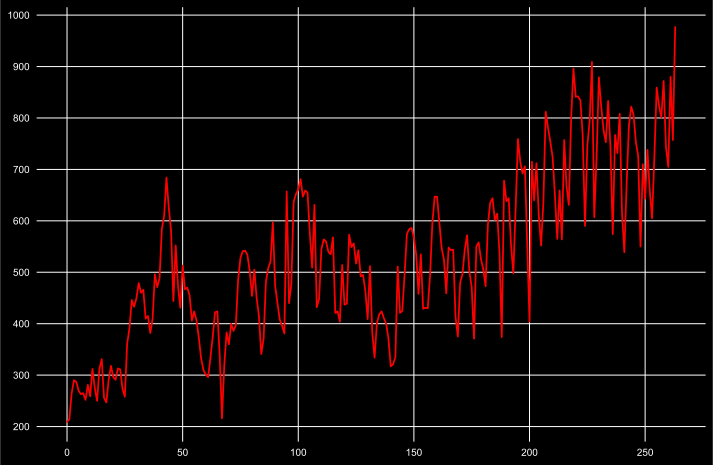

In [5]:
with plt.style.context('dark_background'):
    plt.figure(figsize=(12, 8))
    autoData['Count'].plot(color='red')

## На графике заметен и положительный тренд и ежегодная сезонность (лаг = 12). Также можно заметить рост дисперсии со временем.

## И на boxplot

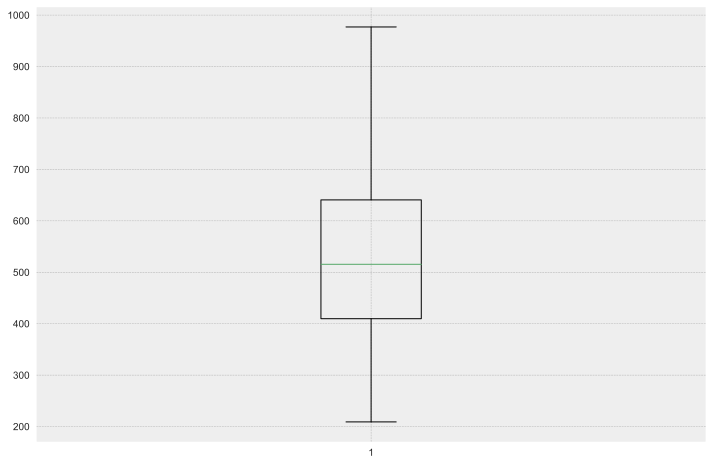

In [6]:
with plt.style.context('bmh'):
    plt.figure(figsize=(12, 8))
    plt.boxplot(autoData['Count'])

## Для начала посмотрим на коррелограммы для оригинального ряда. 

Results of Dickey-Fuller Test:
Test Statistic                  -1.225039
p-value                          0.662733
#Lags Used                      15.000000
Number of Observations Used    248.000000
Critical Value (1%)             -3.456996
Critical Value (5%)             -2.873266
Critical Value (10%)            -2.573019
dtype: float64


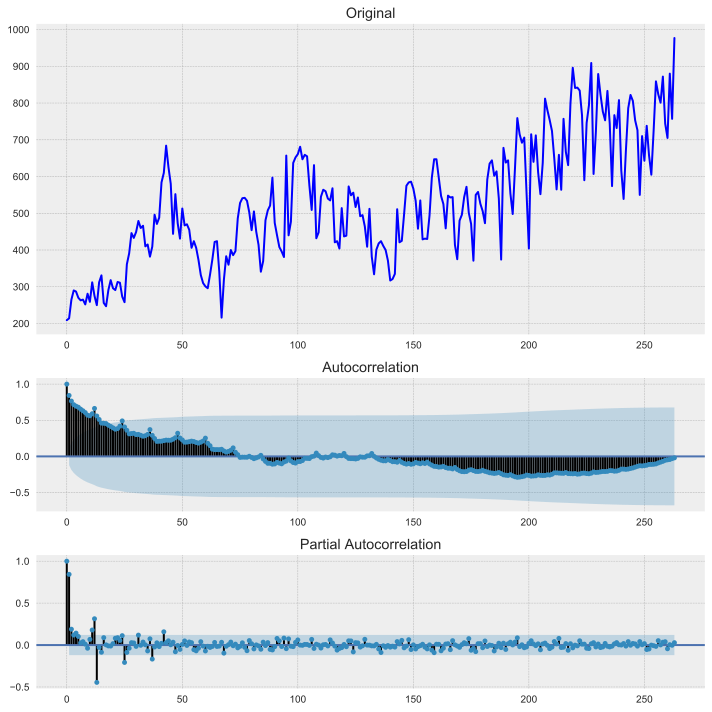

In [7]:
series = autoData['Count']

tsplot(series)

## Теперь избавимся от узменения дисперсии с помощью преобразования Бокса-Кокса. 

Results of Dickey-Fuller Test:
Test Statistic                  -1.941628
p-value                          0.312738
#Lags Used                      14.000000
Number of Observations Used    249.000000
Critical Value (1%)             -3.456888
Critical Value (5%)             -2.873219
Critical Value (10%)            -2.572994
dtype: float64


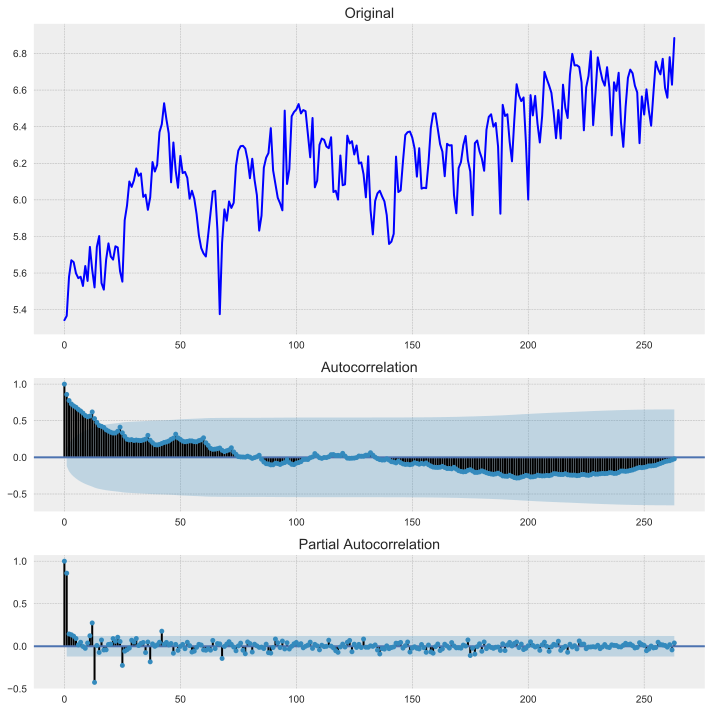

In [8]:
series = boxcox(series, 0)

tsplot(series)

## P-value уменьшелось, но не достаточно. 

## Теперь избавимся от сезонности с помощью сезонного дифф-я. (лаг = 12)

Results of Dickey-Fuller Test:
Test Statistic                  -4.077406
p-value                          0.001055
#Lags Used                      12.000000
Number of Observations Used    239.000000
Critical Value (1%)             -3.458011
Critical Value (5%)             -2.873710
Critical Value (10%)            -2.573256
dtype: float64


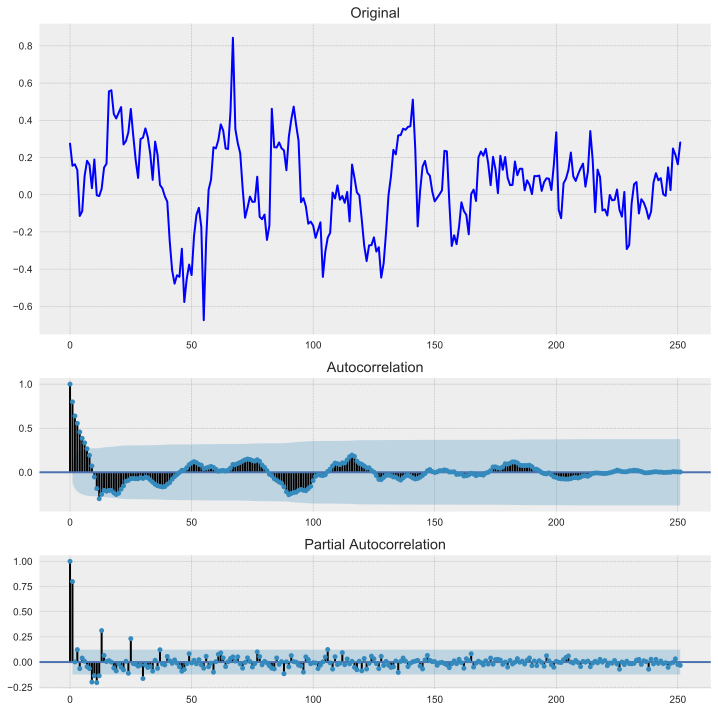

In [9]:
series = series[12:] - series[:-12]

tsplot(series)

## Наш p-value уже < 0.05 и мы могли бы отвергнуть гипотезу о нестационарности, но на коррелограмме заметны колебания, от которых можно избавиться еще одним дифф-ем.

Results of Dickey-Fuller Test:
Test Statistic                -6.528275e+00
p-value                        1.001817e-08
#Lags Used                     1.200000e+01
Number of Observations Used    2.380000e+02
Critical Value (1%)           -3.458128e+00
Critical Value (5%)           -2.873762e+00
Critical Value (10%)          -2.573283e+00
dtype: float64


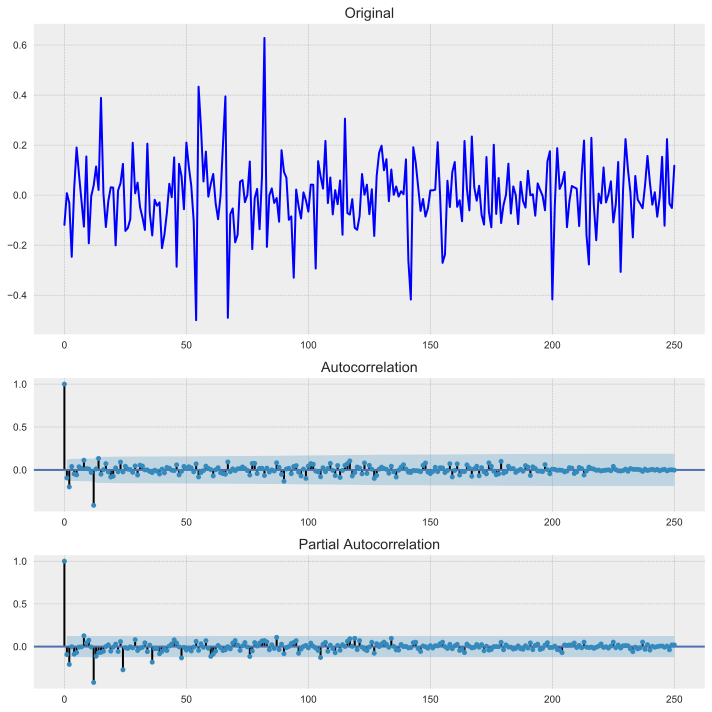

In [10]:
series = series[1:] - series[:-1]

tsplot(series)

## Таким образом, мы получили стационарный ряд.

# Часть №2

In [11]:
indData.head()

,Month,Count
0,1971-W27,890.19
1,1971-W28,901.80
2,1971-W29,888.51
3,1971-W30,887.78
4,1971-W31,858.43


## Посмотрим на наши данные на графике. 

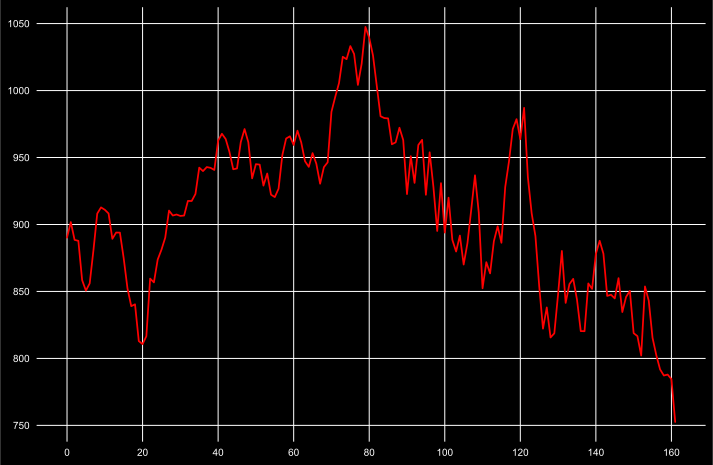

In [12]:
with plt.style.context('dark_background'):
    plt.figure(figsize=(12, 8))
    indData['Count'].plot(color='red')

## На графике заметен тренд, не ярко выраженное изменение дисперсии.

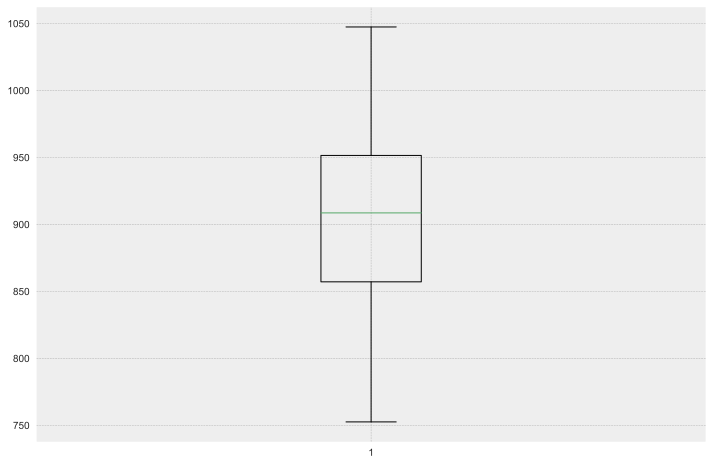

In [13]:
with plt.style.context('bmh'):
    plt.figure(figsize=(12, 8))
    plt.boxplot(indData['Count'])

## Для начала посмотрим на коррелограммы для оригинального ряда. 

Results of Dickey-Fuller Test:
Test Statistic                  -1.314625
p-value                          0.622455
#Lags Used                       0.000000
Number of Observations Used    161.000000
Critical Value (1%)             -3.471633
Critical Value (5%)             -2.879665
Critical Value (10%)            -2.576434
dtype: float64


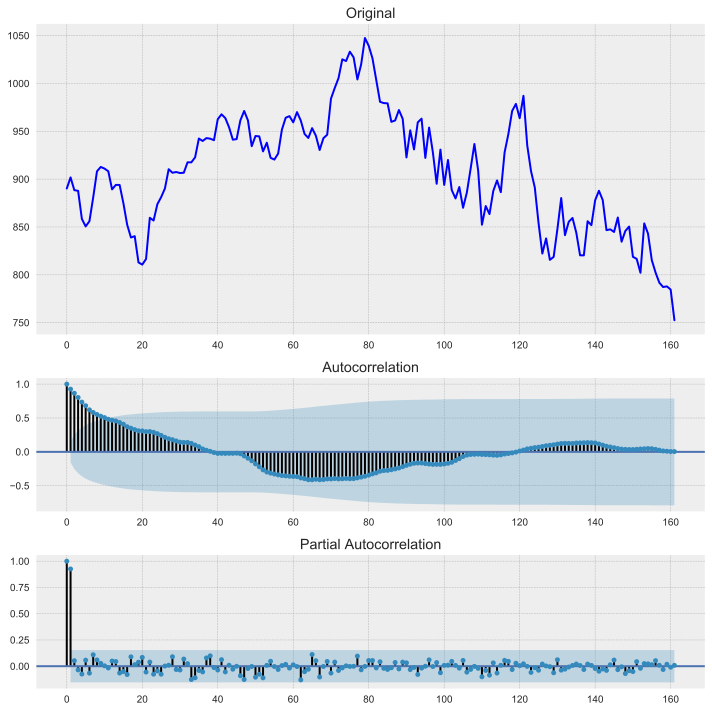

In [14]:
series = indData['Count']

tsplot(series)

## Применим пеобразования Бокса-Кокса. ($\lambda = 5$)

Results of Dickey-Fuller Test:
Test Statistic                  -1.651876
p-value                          0.456062
#Lags Used                       0.000000
Number of Observations Used    161.000000
Critical Value (1%)             -3.471633
Critical Value (5%)             -2.879665
Critical Value (10%)            -2.576434
dtype: float64


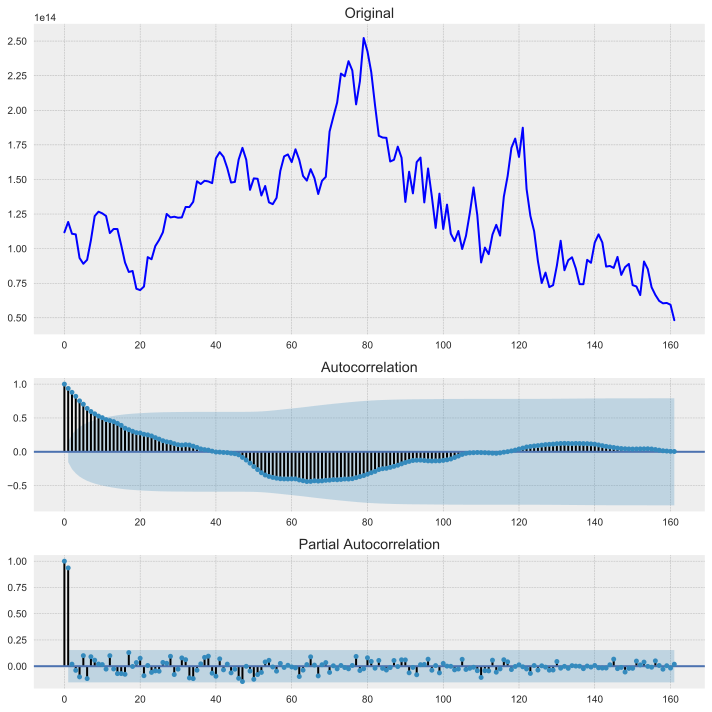

In [15]:
series = boxcox(series, 5)

tsplot(series)

## Избавимся от ярко выраженного тренда с помощью дифф-ия.

Results of Dickey-Fuller Test:
Test Statistic                  -5.598128
p-value                          0.000001
#Lags Used                       5.000000
Number of Observations Used    155.000000
Critical Value (1%)             -3.473259
Critical Value (5%)             -2.880374
Critical Value (10%)            -2.576812
dtype: float64


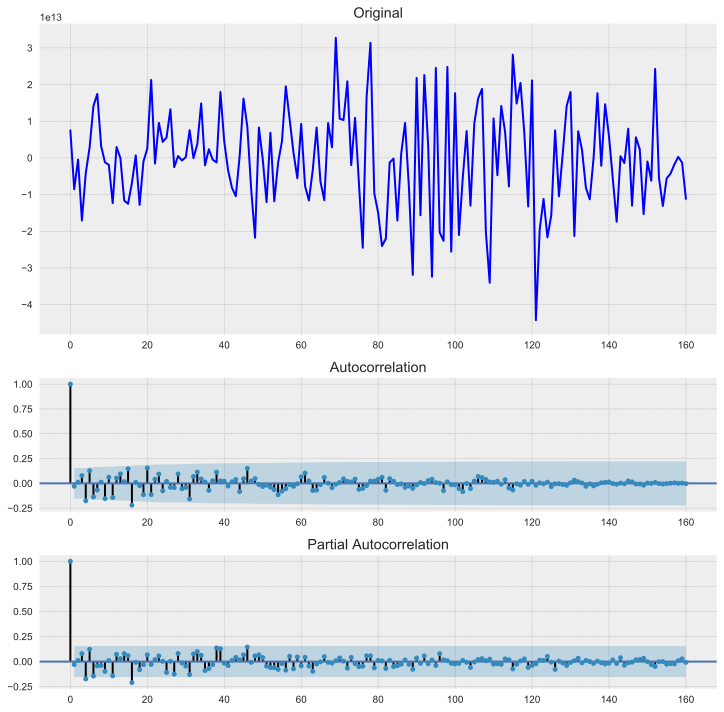

In [16]:
series = series[1:] - series[:-1]

tsplot(series)

## p-value < 0.05 => Мы получили стационарный ряд.